In [1]:
# Scipy


In [2]:
import numpy as np

t_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
t_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, t_max, 'ro')
plt.plot(months, t_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

Text(0, 0.5, 'Min and max temperature')

In [3]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      t_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      t_min, [-40, 20, 0])

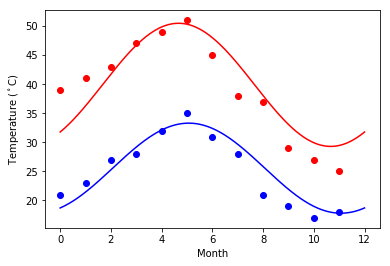

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, t_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, t_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [5]:
#matplotlib

In [6]:
import pandas as pd
import numpy as np

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [7]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url,usecols=["Sex","Age","Fare"])

In [8]:
titanic.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
titanic.isnull().sum()

Sex       0
Age     177
Fare      0
dtype: int64

In [10]:
#Let's Fill Missing Values
titanic["Age"].fillna(titanic.Age.median(),inplace = True)


In [11]:
titanic.isnull().sum()

Sex     0
Age     0
Fare    0
dtype: int64

In [12]:
title_Sex = titanic.groupby('Sex').agg('count')
print(title_Sex)

        Age  Fare
Sex              
female  314   314
male    577   577


In [13]:
Sex_labels = title_Sex.Age.sort_values().index 
Sex_counts = title_Sex.Age.sort_values()

In [14]:
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(1,2 )

<Figure size 1440x720 with 0 Axes>

In [15]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

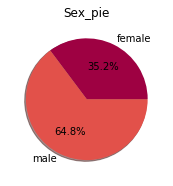

In [16]:
plt.subplot(the_grid[0, 1], aspect=1, title='Sex_pie')
type_show_ids = plt.pie(Sex_counts, labels=Sex_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [17]:
#let's Try to plot Scatter plot

In [18]:
#Let's Encode Sex column
l_unique = titanic['Sex'].unique()
l_unique

array(['male', 'female'], dtype=object)

In [19]:
v_unique = np.arange(len(l_unique))
v_unique

array([0, 1])

In [20]:
titanic['Sex'].replace(to_replace=l_unique, value=v_unique, inplace=True) # replacing categorical data with numerical values
titanic['Sex'].head() # 0 is male and 1 is female

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

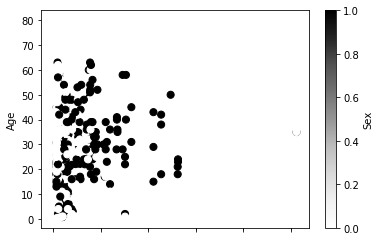

In [23]:

titanic.plot.scatter(x = 'Fare', y = 'Age', c = 'Sex', s = 50)